In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv('Dataset-SA.csv',encoding='latin1')

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
df.dropna(inplace=True)

In [ ]:
#remove punctuations
import string
def rmv_punc(text):
  punct = string.punctuation
  return text.translate(str.maketrans('', '', punct))

In [ ]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))
df['product_price'] = df['product_price'].apply(lambda x: rmv_punc(x))

In [ ]:
def rmv_char(text):
  text = re.sub('[^a-zA-Z0-9]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [ ]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_char(x).lower())
df['product_price'] = df['product_price'].apply(lambda x: rmv_char(x).lower())
df['Sentiment'] = df['Sentiment'].apply(lambda x:str(x).lower())
df['Review'] = df['Review'].apply(lambda x: rmv_char(x).lower())

In [ ]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


Checking for NaN values:
product_price    24673
Sentiment        24673
after            24673
all              24673
also             24673
                 ...  
worth            24673
worthless        24673
wow              24673
you              24673
your             24673
Length: 202, dtype: int64


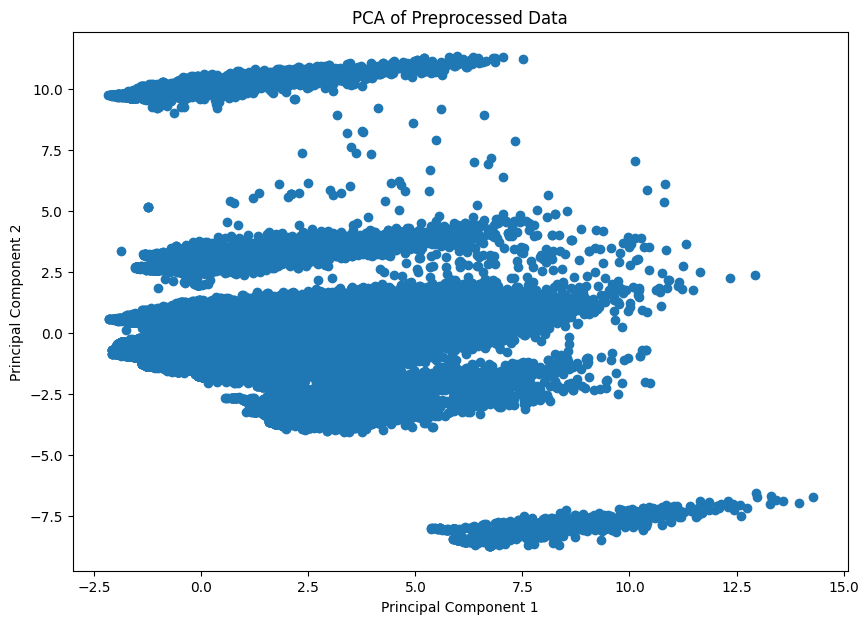

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the preprocessed data

# Convert 'product_price' to numeric (if it's still not)
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce').fillna(0)

# Encode categorical 'Sentiment' if needed
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Convert 'Summary' and 'Review' to TF-IDF vectors
tfidf_summary = TfidfVectorizer(max_features=100)  # Limit the number of features to manage dimensionality
summary_tfidf = tfidf_summary.fit_transform(df['Summary']).toarray()

tfidf_review = TfidfVectorizer(max_features=100)  # Limit the number of features to manage dimensionality
review_tfidf = tfidf_review.fit_transform(df['Review']).toarray()

# Create DataFrame from TF-IDF vectors
summary_df = pd.DataFrame(summary_tfidf, columns=tfidf_summary.get_feature_names_out())
review_df = pd.DataFrame(review_tfidf, columns=tfidf_review.get_feature_names_out())

# Combine TF-IDF features with numeric columns
df_combined = pd.concat([df[['product_price', 'Sentiment']], summary_df, review_df], axis=1)

# Check for NaN values
print("Checking for NaN values:")
print(df_combined.isna().sum())

# Handle NaN values (e.g., fill NaNs with 0)
df_combined = df_combined.fillna(0)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_combined)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA of Preprocessed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
cluster_labels=kmeans.labels_
print(len(df))
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


180379


product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64